## Sampling and estimation


### Random

   * [stackexchange - n vs n-1](http://stats.stackexchange.com/questions/17890/what-is-the-difference-between-n-and-n-1-in-calculating-population-variance)
   
When you *estimate* a variance you should use $n-1$, but when you compute it exactly use $n$.

   * [stackexchange - expected value](http://stats.stackexchange.com/questions/30365/why-is-expectation-the-same-as-the-arithmetic-mean)

This is just a discussion if you need more

   * Binomial vs Hypergeometric
   
Binomial(n,p) - number of successes (n) with probability (p).  The **binomial** assumes replacement and in the cases were we cannot assume replacement use a **hypergeometric**.

   * [why take the log(likelihood)?](http://math.stackexchange.com/questions/892832/why-we-consider-log-likelihood-instead-of-likelihood-in-gaussian-distribution)
   
Products turn into sums and we can avoid computation in the exponential

### Kernel density estimation

   * [Excellent blog about kernels in python](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.stats.distributions import norm
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [3]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the                                                                                                                                
    # input data.  To make the results comparable to the other methods,                                                                                                                             
    # we divide the bandwidth by the sample standard deviation here.                                                                                                                                
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples                                                                                                                                     
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

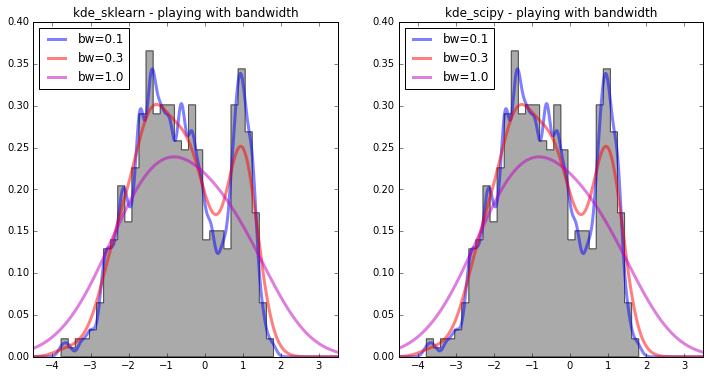

In [13]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
                 
x_grid = np.linspace(-4.5, 3.5, 1000)
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])

for bandwidth in [0.1, 0.3, 1.0]:

    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
    ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
    ax.set_xlim(-4.5, 3.5)
    ax.legend(loc='upper left')

p = ax.set_title("kde_sklearn - playing with bandwidth")  


ax = fig.add_subplot(122)
                 
x_grid = np.linspace(-4.5, 3.5, 1000)
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])

for bandwidth in [0.1, 0.3, 1.0]:

    ax.plot(x_grid, kde_scipy(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
    ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
    ax.set_xlim(-4.5, 3.5)
    ax.legend(loc='upper left')

p = ax.set_title(" kde_scipy - playing with bandwidth")    